In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [2]:
data=pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\niti\Internship_Project\archive\bank.csv",delimiter=";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
num_cols=data[["age","balance","day","duration","campaign","pdays","previous"]]

In [8]:
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


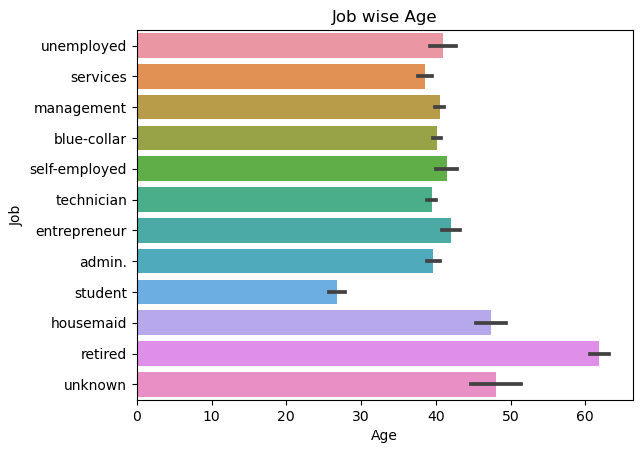

In [9]:
sns.barplot(x="age",y="job",data=data)
plt.xlabel("Age")
plt.ylabel("Job")
plt.title("Job wise Age")
plt.show()

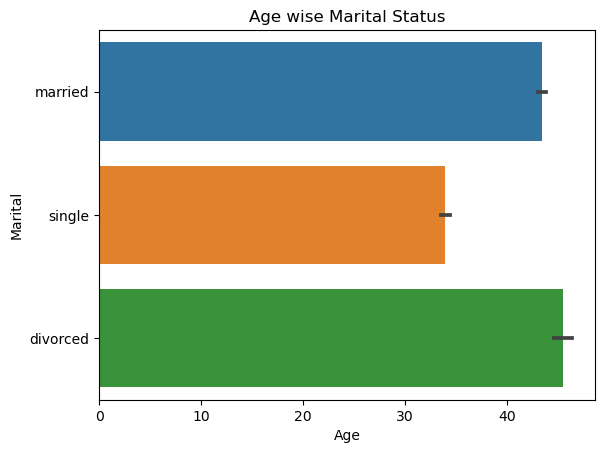

In [10]:
sns.barplot(x="age",y="marital",data=data)
plt.xlabel("Age")
plt.ylabel("Marital")
plt.title("Age wise Marital Status")
plt.show()

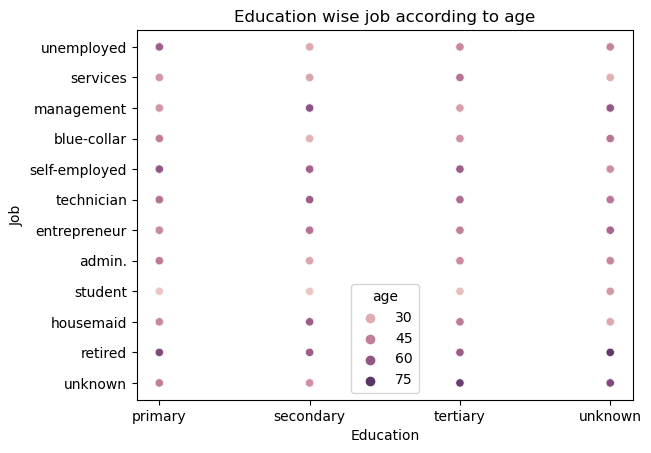

In [11]:
sns.scatterplot(x="education",y="job",hue="age",data=data)
plt.xlabel("Education")
plt.ylabel("Job")
plt.title("Education wise job according to age")
plt.show()

In [12]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


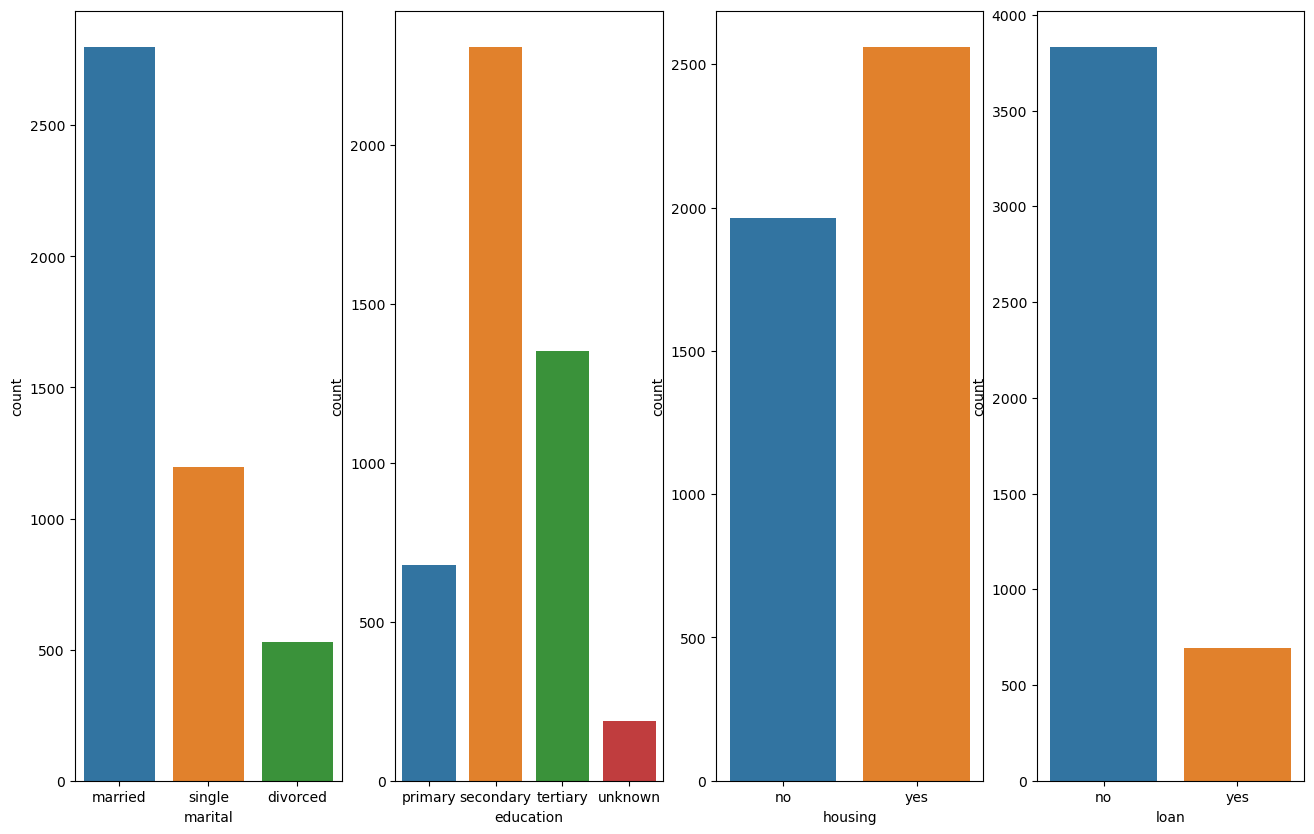

In [13]:
cat_col=data[["marital","education","housing","loan"]]
counter=0
plt.figure(figsize=(20,10))
for i in cat_col:
    counter+=1
    plt.subplot(1,5,counter)
    sns.countplot(x=data[i])
plt.show()

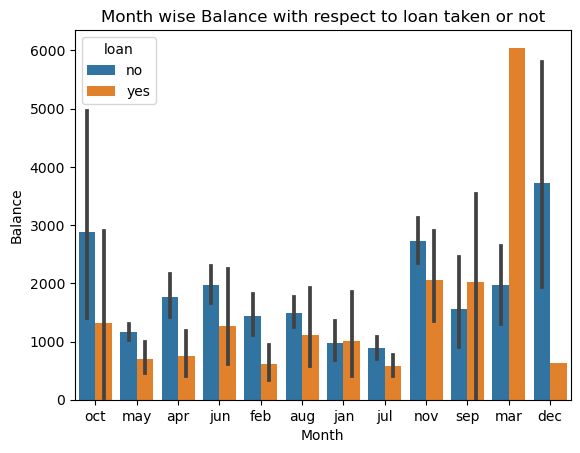

In [14]:
sns.barplot(x="month",y="balance",hue="loan",data=data)
plt.xlabel("Month")
plt.ylabel("Balance")
plt.title("Month wise Balance with respect to loan taken or not")
plt.show()

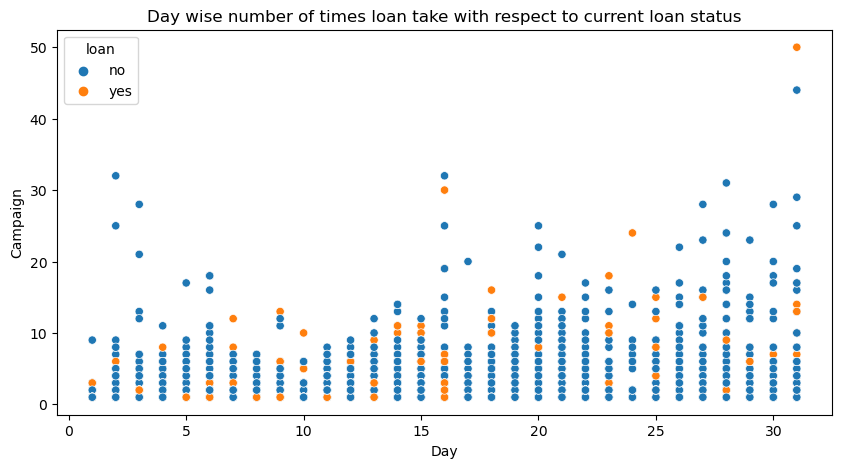

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="day",y="campaign",data=data,hue="loan")
plt.xlabel("Day")
plt.ylabel("Campaign")
plt.title("Day wise number of times loan take with respect to current loan status")
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [17]:
data["Encoded_Job"]=data["job"].map(data["job"].value_counts())
data["Encoded_Marital"]=data["marital"].map(data["marital"].value_counts())
data["Encoded_Education"]=data["education"].map(data["education"].value_counts())
data["Encoded_Housing"]=data["housing"].map(data["housing"].value_counts())
data["Encoded_Loan"]=data["loan"].map(data["loan"].value_counts())
data["Encoded_Contact"]=data["contact"].map(data["contact"].value_counts())
data["Encoded_Month"]=data["month"].map(data["month"].value_counts())

In [18]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Contact,Encoded_Month
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,unknown,no,128,2797,678,1962,3830,2896,80
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,4,failure,no,417,2797,2306,2559,691,2896,1398
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,failure,no,969,1196,1350,2559,3830,2896,293
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,unknown,no,969,2797,1350,2559,691,1324,531
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,unknown,no,946,2797,2306,2559,3830,1324,1398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,0,unknown,no,417,2797,2306,2559,3830,2896,706
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,0,unknown,no,183,2797,1350,2559,691,1324,1398
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,0,unknown,no,768,2797,2306,1962,3830,2896,633
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,3,other,no,946,2797,2306,1962,3830,2896,222


In [19]:
final_data=data.drop(["job","marital","education","housing","loan","contact","month"],axis=1)

In [20]:
final_data

,age,default,balance,day,duration,campaign,pdays,previous,poutcome,y,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Contact,Encoded_Month
0,30,no,1787,19,79,1,-1,0,unknown,no,128,2797,678,1962,3830,2896,80
1,33,no,4789,11,220,1,339,4,failure,no,417,2797,2306,2559,691,2896,1398
2,35,no,1350,16,185,1,330,1,failure,no,969,1196,1350,2559,3830,2896,293
3,30,no,1476,3,199,4,-1,0,unknown,no,969,2797,1350,2559,691,1324,531
4,59,no,0,5,226,1,-1,0,unknown,no,946,2797,2306,2559,3830,1324,1398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,no,-333,30,329,5,-1,0,unknown,no,417,2797,2306,2559,3830,2896,706
4517,57,yes,-3313,9,153,1,-1,0,unknown,no,183,2797,1350,2559,691,1324,1398
4518,57,no,295,19,151,11,-1,0,unknown,no,768,2797,2306,1962,3830,2896,633
4519,28,no,1137,6,129,4,211,3,other,no,946,2797,2306,1962,3830,2896,222


In [21]:
label_encoder=LabelEncoder()
data["Y_encoded"]=label_encoder.fit_transform(data["y"])

In [22]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Contact,Encoded_Month,Y_encoded
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,unknown,no,128,2797,678,1962,3830,2896,80,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,failure,no,417,2797,2306,2559,691,2896,1398,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,failure,no,969,1196,1350,2559,3830,2896,293,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,unknown,no,969,2797,1350,2559,691,1324,531,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,unknown,no,946,2797,2306,2559,3830,1324,1398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,unknown,no,417,2797,2306,2559,3830,2896,706,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,unknown,no,183,2797,1350,2559,691,1324,1398,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,unknown,no,768,2797,2306,1962,3830,2896,633,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,other,no,946,2797,2306,1962,3830,2896,222,0


In [23]:
n_col=data[["age","Encoded_Job","Encoded_Marital","Encoded_Education","Encoded_Housing","Encoded_Loan","Encoded_Contact","Encoded_Month","Y_encoded","day","campaign","balance","duration"]]

In [24]:
n_col.corr()

,age,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Contact,Encoded_Month,Y_encoded,day,campaign,balance,duration
age,1.000000,-0.143661,0.203031,-0.179651,-0.193888,0.011250,-0.106239,-0.113577,0.045092,-0.017853,-0.005148,0.083820,-0.002367
Encoded_Job,-0.143661,1.000000,0.006835,-0.086124,0.147356,0.005025,0.028606,0.087112,-0.043546,0.007010,0.029556,-0.017700,-0.004958
Encoded_Marital,0.203031,0.006835,1.000000,-0.041257,0.033590,-0.023710,-0.044974,-0.001621,-0.064346,0.000456,0.024361,0.023543,-0.036684
Encoded_Education,-0.179651,-0.086124,-0.041257,1.000000,0.094754,-0.082331,0.049528,0.056935,-0.007405,0.012364,-0.010030,-0.059014,0.020968
Encoded_Housing,-0.193888,0.147356,0.033590,0.094754,1.000000,-0.018451,-0.119542,0.368407,-0.104683,-0.031291,-0.003574,-0.050227,0.015740
Encoded_Loan,0.011250,0.005025,-0.023710,-0.082331,-0.018451,1.000000,-0.008444,-0.008829,0.070517,0.004879,-0.017120,0.071349,0.004997
Encoded_Contact,-0.106239,0.028606,-0.044974,0.049528,-0.119542,-0.008444,1.000000,-0.284268,0.094495,-0.000212,-0.023551,-0.009675,0.020058
Encoded_Month,-0.113577,0.087112,-0.001621,0.056935,0.368407,-0.008829,-0.284268,1.000000,-0.149262,-0.019991,0.007835,-0.096424,0.004088
Y_encoded,0.045092,-0.043546,-0.064346,-0.007405,-0.104683,0.070517,0.094495,-0.149262,1.000000,-0.011244,-0.061147,0.017905,0.401118
day,-0.017853,0.007010,0.000456,0.012364,-0.031291,0.004879,-0.000212,-0.019991,-0.011244,1.000000,0.160706,-0.008677,-0.024629


In [25]:
feature=n_col.drop(n_col.columns[[6,8]],axis=1)

In [26]:
feature

,age,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Month,day,campaign,balance,duration
0,30,128,2797,678,1962,3830,80,19,1,1787,79
1,33,417,2797,2306,2559,691,1398,11,1,4789,220
2,35,969,1196,1350,2559,3830,293,16,1,1350,185
3,30,969,2797,1350,2559,691,531,3,4,1476,199
4,59,946,2797,2306,2559,3830,1398,5,1,0,226
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,417,2797,2306,2559,3830,706,30,5,-333,329
4517,57,183,2797,1350,2559,691,1398,9,1,-3313,153
4518,57,768,2797,2306,1962,3830,633,19,11,295,151
4519,28,946,2797,2306,1962,3830,222,6,4,1137,129


In [27]:
target=data["Y_encoded"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.2,random_state=42)

In [29]:
clf=RandomForestClassifier()

In [30]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_clf_pred=clf.predict(x_train)

In [32]:
accuracy = accuracy_score(y_train, y_clf_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [33]:
feature

,age,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Month,day,campaign,balance,duration
0,30,128,2797,678,1962,3830,80,19,1,1787,79
1,33,417,2797,2306,2559,691,1398,11,1,4789,220
2,35,969,1196,1350,2559,3830,293,16,1,1350,185
3,30,969,2797,1350,2559,691,531,3,4,1476,199
4,59,946,2797,2306,2559,3830,1398,5,1,0,226
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,417,2797,2306,2559,3830,706,30,5,-333,329
4517,57,183,2797,1350,2559,691,1398,9,1,-3313,153
4518,57,768,2797,2306,1962,3830,633,19,11,295,151
4519,28,946,2797,2306,1962,3830,222,6,4,1137,129


In [34]:
feature.columns

Index(['age', 'Encoded_Job', 'Encoded_Marital', 'Encoded_Education',
       'Encoded_Housing', 'Encoded_Loan', 'Encoded_Month', 'day', 'campaign',
       'balance', 'duration'],
      dtype='object')

In [35]:
user_input_data=data[["age","job","marital","education","balance","housing","loan","day","month","duration","campaign"]]

In [36]:
user_input_data

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign
0,30,unemployed,married,primary,1787,no,no,19,oct,79,1
1,33,services,married,secondary,4789,yes,yes,11,may,220,1
2,35,management,single,tertiary,1350,yes,no,16,apr,185,1
3,30,management,married,tertiary,1476,yes,yes,3,jun,199,4
4,59,blue-collar,married,secondary,0,yes,no,5,may,226,1
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,30,jul,329,5
4517,57,self-employed,married,tertiary,-3313,yes,yes,9,may,153,1
4518,57,technician,married,secondary,295,no,no,19,aug,151,11
4519,28,blue-collar,married,secondary,1137,no,no,6,feb,129,4


In [37]:
age=int(input("Age:"))
job=input("Job:")
marital=input("Marital:")
education=input("Education:")
balance=int(input("Enter balance:"))
housing=input("Housing:")
loan=input("Loan:")
day=int(input("Day:"))
month=input("Month:")
duration=int(input("Duration:"))
campaign=int(input("Campaign"))
user_input={
    'age':age,
    'Encoded_Job':job,
    'Encoded_Marital':marital,
    'Encoded_Education':education,
    'Encoded_Housing':housing,
    'Encoded_Loan':loan,
    'Encoded_Month':month,
    'day':day,
    'campaign':campaign,
    'balance':balance,
    'duration':duration,
}

Age: 18
Job: self employeed
Marital: single 
Education: tertiary
Enter balance: 185000
Housing: yes
Loan: yes
Day: 45
Month: nov
Duration: 457
Campaign 0


In [38]:
user_input_df=pd.DataFrame([user_input])

In [39]:
encode_model=LabelEncoder()

In [40]:
#for num in ["age", "balance", "day", "duration", "campaign"]:
#    user_input_df[num] = StandardScaler().fit_transform(user_input_df[[num]].values.reshape(-1,1))
for col in ["Encoded_Job", "Encoded_Marital", "Encoded_Education", "Encoded_Housing", "Encoded_Loan", "Encoded_Month"]:
    user_input_df[col] = LabelEncoder().fit_transform(user_input_df[[col]].values.reshape(-1,1))
#encoded_features = user_input_df[["job", "marital", "education", "housing", "loan", "month"]]

C:\Users\desai\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\desai\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\desai\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\desai\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [41]:
user_input_df

,age,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Month,day,campaign,balance,duration
0,18,0,0,0,0,0,0,45,0,185000,457


In [42]:
x_train

,age,Encoded_Job,Encoded_Marital,Encoded_Education,Encoded_Housing,Encoded_Loan,Encoded_Month,day,campaign,balance,duration
1605,53,417,2797,2306,2559,691,293,16,2,-2,144
4369,57,768,2797,2306,2559,3830,1398,30,3,16063,352
2324,34,946,2797,2306,2559,691,1398,8,2,103,956
2709,32,969,2797,1350,2559,691,706,18,3,273,97
3866,28,946,1196,2306,2559,3830,1398,28,1,0,386
...,...,...,...,...,...,...,...,...,...,...,...
4426,41,478,2797,1350,1962,3830,1398,4,2,1536,54
466,34,183,2797,2306,2559,3830,1398,21,1,-370,748
3092,46,969,2797,1350,2559,3830,1398,6,4,523,105
3772,47,969,1196,1350,1962,3830,633,21,4,440,71


In [44]:
prediction=clf.predict(user_input_df)
if prediction==0:
    print("You are not eligible for credit card")
else:
    print("You are eligible for credit card")

You are not eligible for credit card
